# Classifier Comparison

*... modified for students at FHNW by [Andreas Martin, PhD](https://andreasmartin.ch).*

> Original code source: Gaël Varoquaux and Andreas Müller
> Modified for scikit-learn.org documentation by Jaques Grobler

|[![deepnote](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?url=https%3A%2F%2Fgithub.com%2FAI4BP%2Fainotes%2Fblob%2Fmain%2Fsklearn-getting-started%2Fipynb%2Fclassifier-comparison.ipynb)|[![Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI4BP/ainotes/blob/main/sklearn-getting-started/ipynb/classifier-comparison.ipynb)|[![Gitpod](https://img.shields.io/badge/Gitpod-Run%20in%20VS%20Code-908a85?logo=gitpod)](https://gitpod.io/#https://github.com/AI4BP/ainotes/)|[![GitHub.dev](https://img.shields.io/badge/github.dev-Open%20in%20VS%20Code-908a85?logo=github)](https://github.dev/AI4BP/ainotes/blob/main/sklearn-getting-started/ipynb/classifier-comparison.ipynb)|
|-|-|-|-|

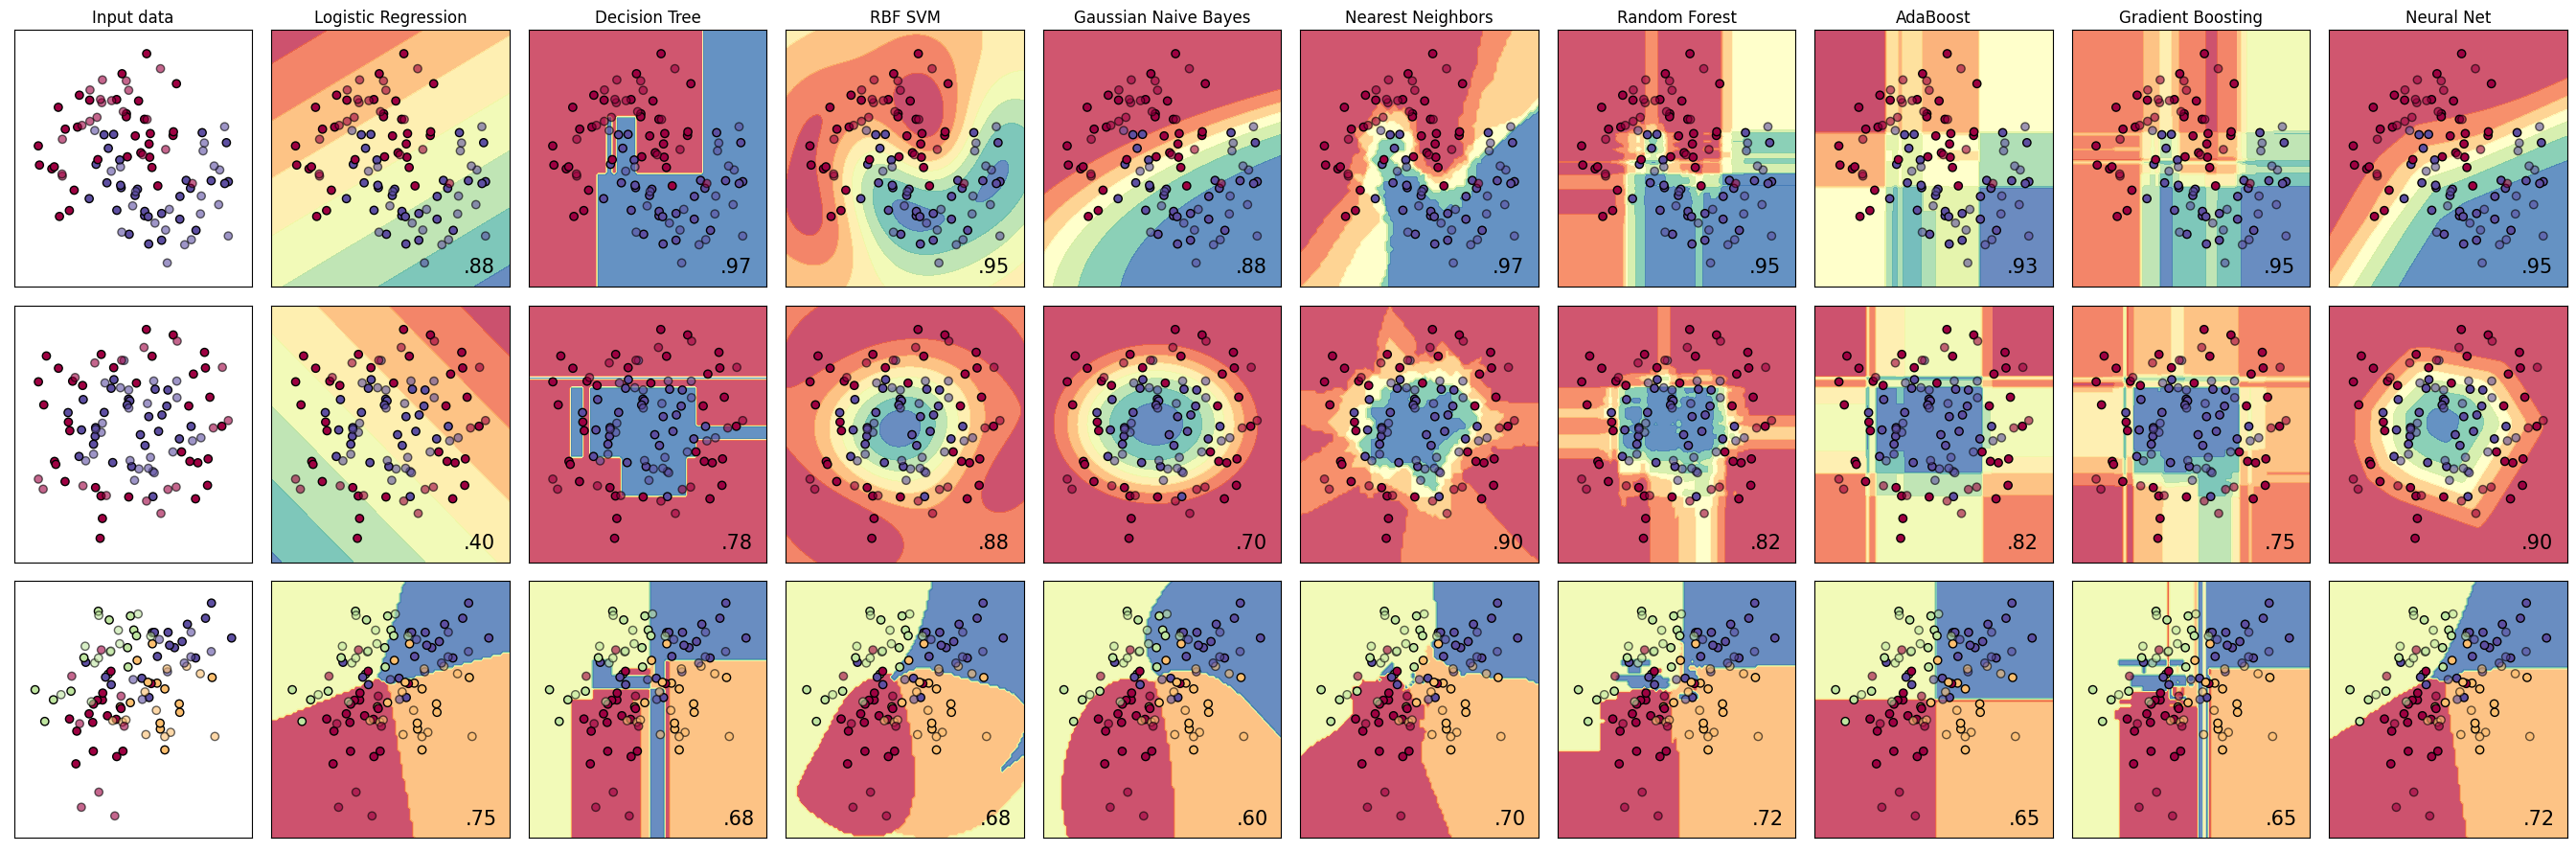

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


names = [
    "Logistic Regression",
    "Decision Tree",
    "RBF SVM",
    "Gaussian Naive Bayes",
    "Nearest Neighbors",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "Neural Net"
]

classifiers = [
    LogisticRegression(max_iter=1000, multi_class="auto"),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=4)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable
]

figure = plt.figure(figsize=(27, 9))

i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plot the dataset
    cm = plt.cm.Spectral
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors="k")

    # plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors="k")
        
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors="k", alpha=0.6)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d0fd9439-c605-456d-a503-a84c619fa8f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>